In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, MaxAbsScaler
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_recall_fscore_support
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data_path = '/content/heart_2020_cleaned 2.csv'
heart_disease_data = pd.read_csv(data_path)

heart_disease_data = heart_disease_data.dropna()

heart_disease_data

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [7]:
heart_disease_data = heart_disease_data.drop(['GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer'], axis=1)

In [8]:
categorical_features = ['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'AgeCategory', 'Race', 'Diabetic', 'HeartDisease', 'PhysicalActivity']
enc = OrdinalEncoder()
heart_disease_data[categorical_features] = enc.fit_transform(heart_disease_data[categorical_features])

In [9]:
categorical_features = ['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity']
# categorical_features = ['DiffWalking', 'AgeCategory', 'Diabetic', 'PhysicalActivity', 'SkinCancer']

# categorical_transformer = OneHotEncoder()

# preprocessor = ColumnTransformer(
#     transformers=[
#         ('cat', categorical_transformer, categorical_features)
#     ], remainder='passthrough')

pipeline = Pipeline([
    # ('preprocessor', preprocessor),
    ('scaler', MaxAbsScaler()),
    ('classifier', DecisionTreeClassifier(max_depth=10, random_state=42))
])


In [11]:
heart_disease_data

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,SleepTime
0,0.0,16.60,1.0,0.0,0.0,3.0,30.0,0.0,0.0,7.0,5.0,2.0,1.0,5.0
1,0.0,20.34,0.0,0.0,1.0,0.0,0.0,0.0,0.0,12.0,5.0,0.0,1.0,7.0
2,0.0,26.58,1.0,0.0,0.0,20.0,30.0,0.0,1.0,9.0,5.0,2.0,1.0,8.0
3,0.0,24.21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,5.0,0.0,0.0,6.0
4,0.0,23.71,0.0,0.0,0.0,28.0,0.0,1.0,0.0,4.0,5.0,0.0,1.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1.0,27.41,1.0,0.0,0.0,7.0,0.0,1.0,1.0,8.0,3.0,2.0,0.0,6.0
319791,0.0,29.84,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,3.0,0.0,1.0,5.0
319792,0.0,24.24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,3.0,0.0,1.0,6.0
319793,0.0,32.81,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,12.0


In [10]:
heart_disease_data['HeartDisease'].value_counts()

HeartDisease
0.0    292422
1.0     27373
Name: count, dtype: int64

In [11]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X, y = smote.fit_resample(heart_disease_data.drop('HeartDisease', axis=1), heart_disease_data['HeartDisease'])

In [12]:
y.value_counts()

HeartDisease
0.0    292422
1.0    292422
Name: count, dtype: int64

In [12]:
X

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,SleepTime
0,16.600000,1.000000,0.0,0.0,3.000000,30.0,0.000000,0.000000,7.0,5.000000,2.000000,1.000000,5.000000
1,20.340000,0.000000,0.0,1.0,0.000000,0.0,0.000000,0.000000,12.0,5.000000,0.000000,1.000000,7.000000
2,26.580000,1.000000,0.0,0.0,20.000000,30.0,0.000000,1.000000,9.0,5.000000,2.000000,1.000000,8.000000
3,24.210000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,11.0,5.000000,0.000000,0.000000,6.000000
4,23.710000,0.000000,0.0,0.0,28.000000,0.0,1.000000,0.000000,4.0,5.000000,0.000000,1.000000,8.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
584839,23.490000,0.000000,0.0,0.0,0.000000,0.0,0.000629,1.000000,12.0,1.000629,2.000000,0.999371,8.000000
584840,29.154744,0.000000,0.0,0.0,0.000000,0.0,0.000000,1.000000,11.0,5.000000,0.000000,1.000000,7.000000
584841,36.571624,0.000000,0.0,0.0,20.000000,0.0,1.000000,0.011797,10.0,5.000000,0.023594,0.000000,7.011797
584842,23.192495,0.000000,0.0,0.0,0.000000,10.0,0.286420,0.286420,5.0,2.713580,0.286420,1.000000,3.427159


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [14]:
X_train

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,SleepTime
109425,29.120000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,9.000000,5.000000,0.0,1.000000,8.000000
565687,32.920182,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.369265,6.369265,2.000000,0.0,1.000000,8.000000
546086,28.081629,1.000000,0.000000,0.0,0.0,0.0,0.000000,1.000000,8.000000,5.000000,2.0,1.000000,6.897006
396678,18.456910,1.000000,0.000000,0.0,5.0,0.0,0.000000,1.000000,7.406207,4.593793,0.0,0.406207,6.812414
304336,28.210000,1.000000,0.000000,0.0,7.0,20.0,0.000000,1.000000,7.000000,5.000000,2.0,1.000000,7.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
429186,42.348237,0.399745,0.600255,0.0,0.0,0.0,0.399745,1.000000,5.600255,3.600255,2.0,1.000000,6.000000
428015,22.557384,1.000000,0.892954,0.0,0.0,5.0,0.000000,0.892954,5.892954,5.000000,0.0,1.000000,5.000000
17690,22.960000,1.000000,0.000000,0.0,7.0,15.0,0.000000,1.000000,3.000000,5.000000,0.0,1.000000,5.000000
168750,31.570000,0.000000,0.000000,0.0,3.0,3.0,0.000000,1.000000,10.000000,5.000000,0.0,1.000000,7.000000


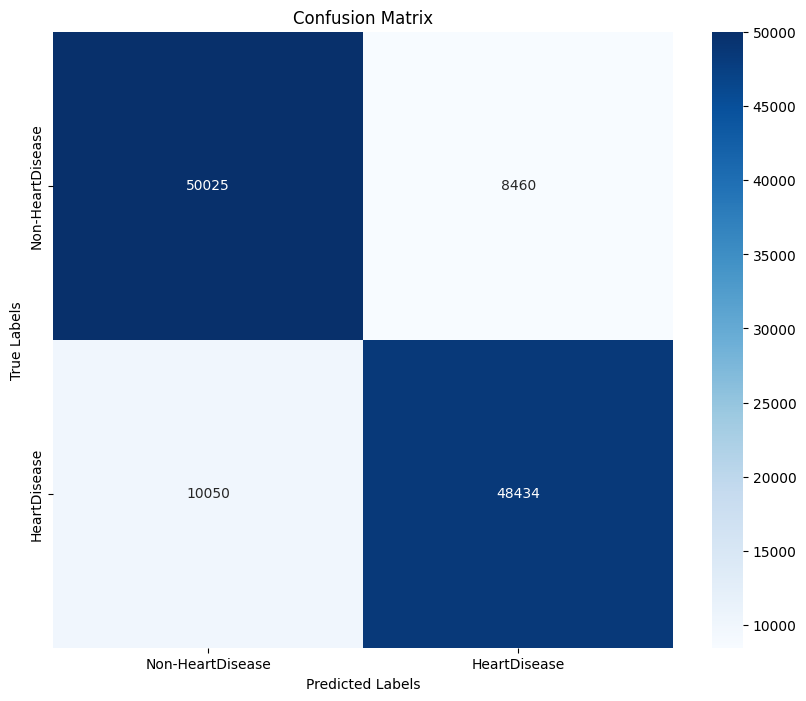

Матриця помилок:
 [[50025  8460]
 [10050 48434]]
Precision: 84.20%
Recall: 84.18%
F1 Score: 84.17%
Accuracy: 84.18%


In [15]:
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred) * 100
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='macro')
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-HeartDisease', 'HeartDisease'], yticklabels=['Non-HeartDisease', 'HeartDisease'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

print("Матриця помилок:\n", conf_matrix)
print("Precision: {:.2f}%".format(precision * 100))
print("Recall: {:.2f}%".format(recall * 100))
print("F1 Score: {:.2f}%".format(f1_score * 100))
print("Accuracy: {:.2f}%".format(accuracy))

In [ ]:
from sklearn.svm import SVC

pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('svm', SVC(kernel='linear', C=1.0, random_state=42))  ])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred) * 100
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='macro')

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=['Non-HeartDisease', 'HeartDisease'], yticklabels=['Non-HeartDisease', 'HeartDisease'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
print("Матриця помилок:\n", conf_matrix)
print(" Precision: {:.2f}%".format(precision * 100))
print(" Recall: {:.2f}%".format(recall * 100))
print(" F1 Score: {:.2f}%".format(f1_score * 100))
print("Model Accuracy: {:.2f}%".format(accuracy))

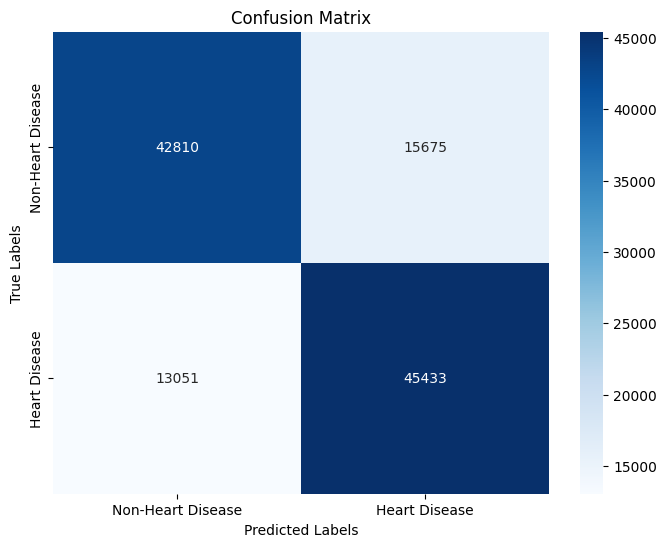

Матриця помилок:
 [[42810 15675]
 [13051 45433]]
Precision: [0.76636652 0.74348694]
Recall: [0.73198256 0.77684495]
F1-score: [0.74878002 0.75979999]
Accuracy: 75.44%


In [13]:
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Heart Disease', 'Heart Disease'], yticklabels=['Non-Heart Disease', 'Heart Disease'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

print("Матриця помилок:\n", conf_matrix)
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1_score}")
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))

In [17]:
X_test.head(5)

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,SleepTime
398062,31.036358,1.0,0.0,0.000000,30.000000,30.0,1.0,1.0,7.000000,5.0,0.026014,0.000000,5.0
94108,23.300000,1.0,0.0,0.000000,0.000000,0.0,0.0,0.0,8.000000,5.0,0.000000,1.000000,7.0
338279,31.872856,1.0,0.0,0.000000,30.000000,0.0,1.0,1.0,3.424179,5.0,0.000000,0.000000,8.0
111838,32.150000,0.0,0.0,0.000000,2.000000,2.0,1.0,1.0,4.000000,5.0,2.000000,1.000000,7.0
379944,30.897951,1.0,0.0,0.681096,12.637808,0.0,1.0,1.0,8.681096,5.0,0.000000,0.318904,10.0


In [19]:
import tensorflow as tf
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, cohen_kappa_score
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support

# Define the DNN model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.25),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

Epoch 1/7
14622/14622 [==============================] - 46s 3ms/step - loss: 0.5306 - accuracy: 0.7385 - precision: 0.7101 - recall: 0.8061
Epoch 2/7
14622/14622 [==============================] - 43s 3ms/step - loss: 0.5006 - accuracy: 0.7592 - precision: 0.7403 - recall: 0.7985
Epoch 3/7
14622/14622 [==============================] - 40s 3ms/step - loss: 0.4782 - accuracy: 0.7709 - precision: 0.7556 - recall: 0.8010
Epoch 4/7
14622/14622 [==============================] - 41s 3ms/step - loss: 0.4639 - accuracy: 0.7780 - precision: 0.7634 - recall: 0.8059
Epoch 5/7
14622/14622 [==============================] - 38s 3ms/step - loss: 0.4552 - accuracy: 0.7821 - precision: 0.7700 - recall: 0.8046
Epoch 6/7
14622/14622 [==============================] - 41s 3ms/step - loss: 0.4509 - accuracy: 0.7842 - precision: 0.7739 - recall: 0.8030
Epoch 7/7
3656/3656 [==============================] - 6s 2ms/step - loss: 0.4698 - accuracy: 0.7809 - precision: 0.7233 - recall: 0.9100
Accuracy: 78.09%

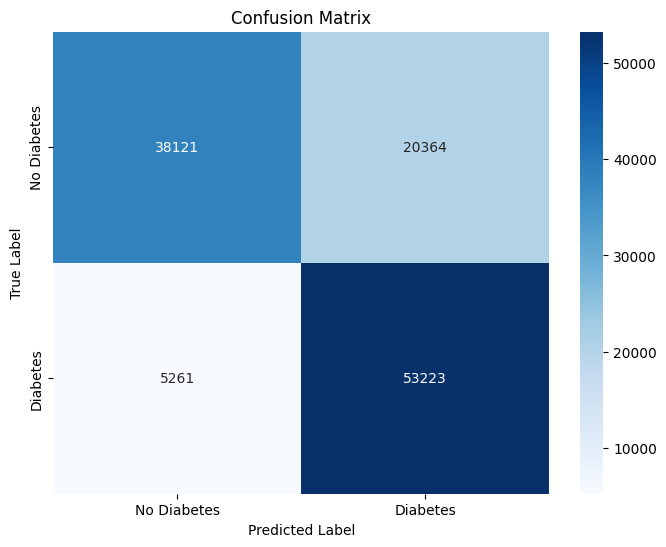


Overall Metrics:
Precision: 80.10%
Recall: 78.09%
F1-Score: 77.72%

Classification Report:
               precision    recall  f1-score   support

         0.0       0.88      0.65      0.75     58485
         1.0       0.72      0.91      0.81     58484

    accuracy                           0.78    116969
   macro avg       0.80      0.78      0.78    116969
weighted avg       0.80      0.78      0.78    116969



In [20]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

model.fit(X_train, y_train, epochs=7)

test_loss, test_acc, test_precision, test_recall = model.evaluate(X_test, y_test)
print("Accuracy: {:.2f}%".format(test_acc * 100))


y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred, average='weighted')

print("\nOverall Metrics:")
print("Precision: {:.2f}%".format(precision * 100))
print("Recall: {:.2f}%".format(recall * 100))
print("F1-Score: {:.2f}%".format(fscore * 100))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


In [16]:
model.save('dnn_after_smote.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [4]:
new_model = load_model("dnn_after_smote.h5")

In [5]:
converter = tf.lite.TFLiteConverter.from_keras_model(new_model)
tfmodel = converter.convert()
open("dnn_after_smote.tflite", "wb").write(tfmodel)

51108